In [1]:
import numpy
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
sampling_freq, ori_signal = wavfile.read('sample/spoken_word.wav')

In [3]:
print("sampling Hz : ", sampling_freq)
print("signal shape : ", ori_signal.shape)
print("type : ", ori_signal.dtype)
print("signal duration : ", round(ori_signal.shape[0] / float(sampling_freq), 2))

sampling Hz :  8000
signal shape :  (3251,)
type :  int16
signal duration :  0.41


In [4]:
signal = ori_signal / (2 ** 15)
# -(2^15) ~ (2^15)-1

In [5]:
len_signal = len(signal)
len_half = int(len_signal / 2)

print(len_signal)
print(len_half)

3251
1625


In [6]:
freq_signal = numpy.fft.fft(signal)

print(len(freq_signal))
print(freq_signal.dtype)

3251
complex128


In [7]:
freq_signal = numpy.abs(freq_signal[0 : len_half + 1]) / len_signal
#절반만 사용하는 이유는 좌우 대칭이기 때문

freq_signal **= 2

In [8]:
len_fts = len(freq_signal)

if len_signal % 2 :
    freq_signal[1:len_fts] *= 2
else :
    freq_signal[1:len_fts-1] *= 2

In [9]:
signal_power = 10 * numpy.log10(freq_signal)

In [10]:
x_axis= numpy.arange(0, len_fts, 1) * (sampling_freq / len_signal) / 1000
#1000으로 나눈 이유는 KHz

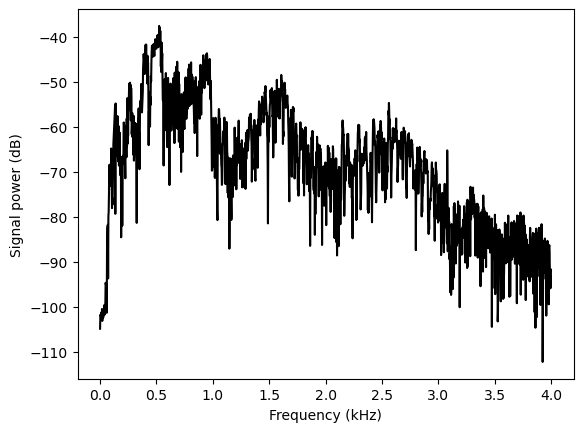

In [11]:
fig, ax = plt.subplots()
ax.plot(x_axis, signal_power, color = "black")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal power (dB)")
plt.show()